# TDA  with Python using the Gudhi Library 

# Representing sublevel sets of functions using cubical complexes 

**Author**  : B. Michel

In [1]:
import numpy as np
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
%matplotlib inline

TDA signatures can be extracted from the upper level or sublevel sets of a function  $f :\mathbb R^p \mapsto \mathbb R$. 

One possible approach for studying the topology of the sublevel sets of $f$ is to define a regular grid on $R^d$ and then a filtered complex with vertices located on this grid, with $f$ as filtration function. Such a grid-based filtered complex is called a **cubical complexes** in Gudhi. See the [documentation](https://gudhi.inria.fr/python/latest/cubical_complex_user.html) of its constructor.

### Crater dataset

We use the crater dataset to illustrate cubical complex filtrations:

In [2]:
f = open("./crater_tuto", "rb")
crater = pickle.load(f)
f.close()

The point cloud is in $\mathbb R^2$ and is composed of a central annulus and four clusters at the corners:

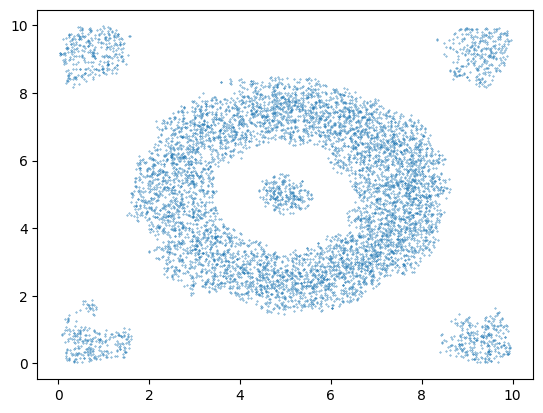

In [3]:
plt.scatter(crater[:, 0], crater[:, 1], s = 0.1);

Instead of directly defining a Vietoris-Rips complex or an alpha complex on the point cloud, we want to study the upper level sets of a density estimator computed on the point cloud. 

We can  visualize the estimated density with a standard 2d-kernel estimator with the `seaborn` module:

/home/eah4d/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eah4d/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eah4d/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eah4d/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

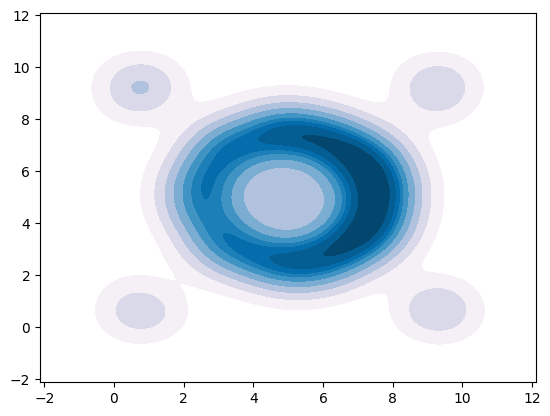

In [5]:
sns.kdeplot(
    x = crater[:, 0], 
    y = crater[:, 1], 
    fill = True, 
    cmap = "PuBu", 
    bw_method = .3
);

### Cubical complex for the crater dataset

We first define a regular grid on $[0,10] \times [0,10]$.

In [6]:
xval = np.arange(0, 10, 0.05)
yval = np.arange(0, 10, 0.05)
nx = len(xval)
ny = len(yval)

Next we fit a $2$-dimensional standard kernel density estimator on the data using `scikit-learn`:

In [26]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.5).fit(crater)
positions = np.array([[u, v] for u in xval for v in yval])

The cubical complex filtration considers the sublevel sets of the filtration fonction. For studying the upper level sets of the density we need to take the opposite of the KDE. We define the filtration value  at each vertex as follows:

In [27]:
filt_values = -kde.score_samples(X = positions)

The range of filtration values is :

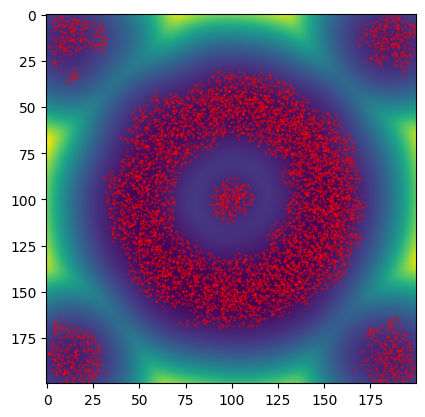

In [34]:
plt.imshow(filt_values.reshape(nx,ny))
plt.scatter(20*crater[:, 0], 20*crater[:, 1], s = 0.1, c='r' );

In [9]:
print(min(filt_values), max(filt_values))

3.265212188580234 26.527204685017296


Note that the filtration values are positive because the `score_samples()` method of the `KernelDensity` class returns the log-density which is, by definition, always negative.

We are now all set to compute the cubical complex filtration based on the grid `[xval, yval]` using the values stored in `filt_values` as filtration values:

In [39]:
cc_density_crater = gd.CubicalComplex(
    dimensions = [nx ,ny], 
    top_dimensional_cells = filt_values
)

Note that a cubical complex is not a simplex tree object:

In [40]:
type(cc_density_crater)

gudhi.cubical_complex.CubicalComplex

However the class `CubicalComplex` has similar methods:

In [41]:
cc_density_crater.dimension()

2

In [42]:
cc_density_crater.num_simplices()

160801

In [43]:
diag1 = [[2.7, 3.7],[9.6, 14.],[34.2, 34.974], [3.,float('Inf')]]
diag2 = [[2.8, 4.45],[9.5, 14.1],[3.2,float('Inf')]]

message = "Bottleneck distance approximation = " + '%.2f' % gd.bottleneck_distance(diag1, diag2, 0.1)
print(message)

message = "Bottleneck distance value = " + '%.2f' % gd.bottleneck_distance(diag1, diag2)
print(message)

Bottleneck distance approximation = 0.72
Bottleneck distance value = 0.75
